### Test planning project

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from grid_planning_utils import a_star, heuristic, create_grid, prune_path
import time
%matplotlib inline

In [26]:
plt.rcParams['figure.figsize'] = 10,10

In [27]:
filename = 'colliders.csv'
data = np.loadtxt(filename, delimiter=',', dtype='Float64', skiprows=2)
print(data)

[[-310.2389   -439.2315     85.5         5.          5.         85.5     ]
 [-300.2389   -439.2315     85.5         5.          5.         85.5     ]
 [-290.2389   -439.2315     85.5         5.          5.         85.5     ]
 ...
 [ 257.8061    425.1645      1.75852     1.292725    1.292725    1.944791]
 [ 293.9967    368.3391      3.557666    1.129456    1.129456    3.667319]
 [ 281.5162    354.4156      4.999351    1.053772    1.053772    4.950246]]


In [28]:
# Static drone altitude (meters)
drone_altitude = 5

# Minimum distance stay away from obstacle (meters)
safe_distance = 5

In [29]:
grid, _, _= create_grid(data, drone_altitude, safe_distance)

In [30]:
grid

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

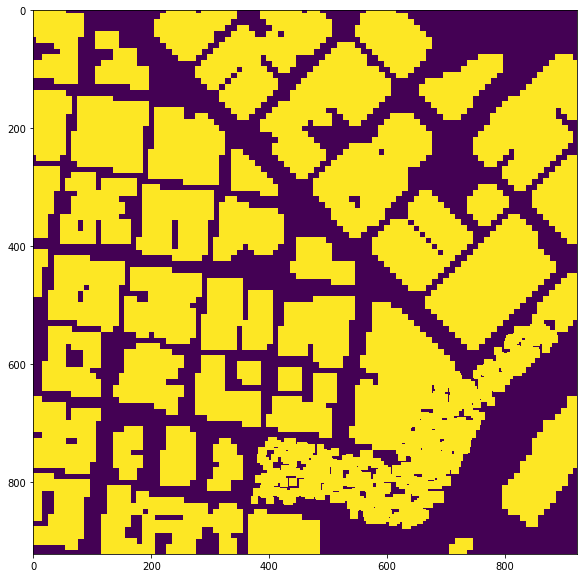

In [31]:
plt.imshow(grid)

In [67]:
grid_start =(316, 445)
grid_goal = (787, 100)
# grid_goal = (499, 489)

In [68]:
start_time = time.time()
path, cost = a_star(grid, heuristic, grid_start, grid_goal)
print(len(path), cost)
# prune path to minimize number of waypoints
pruned_path = prune_path(path)
time_duration = time.time()-start_time
print(" {:.2f} seconds".format(time_duration))

Found a path.
630 179207.5135339773
 17.07 seconds


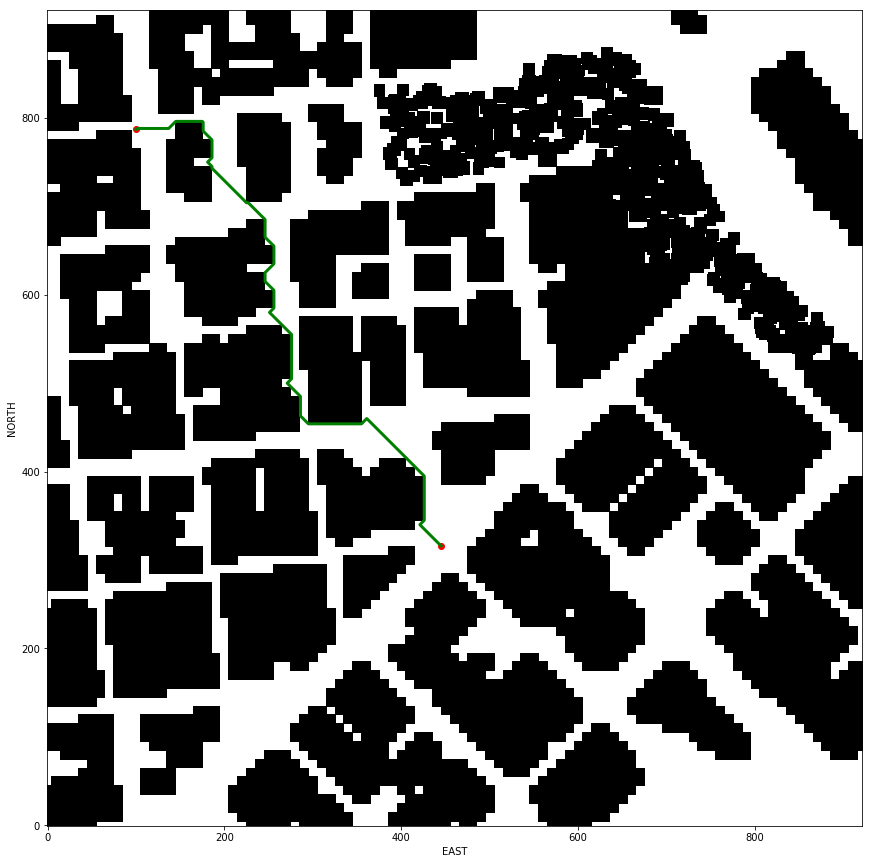

In [69]:
plt.imshow(grid,cmap = 'Greys', origin='lower')

# For the purposes of the visual the east coordinate lay along
# the x-axis and the north coordinates long the y-axis.
plt.plot(grid_start[1], grid_start[0], 'o', color ='red')
plt.plot(grid_goal[1], grid_goal[0], 'o', color = 'red')

pp = np.array(path)
plt.plot(pp[:, 1], pp[:, 0], 'g',linewidth=3)

plt.xlabel('EAST')
plt.ylabel('NORTH')
plt.show()

## Plot Initial Path together with  Path Pruning

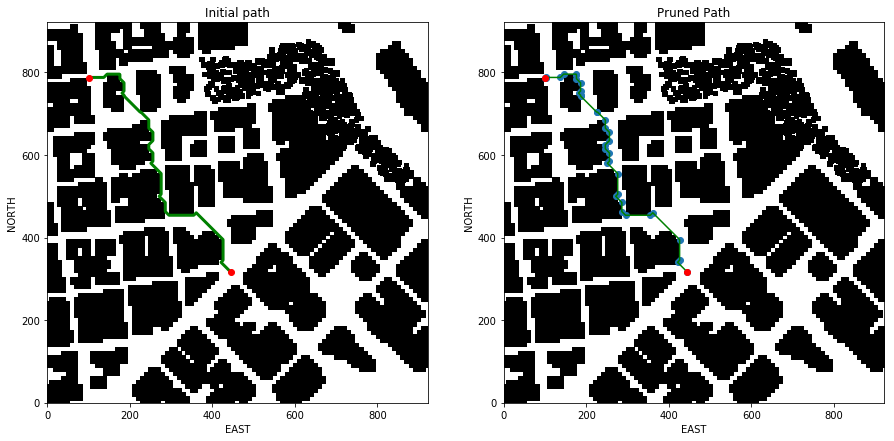

In [70]:
plt.rcParams['figure.figsize']=15,15

plt.subplot(1,2,1)
plt.imshow(grid, cmap='Greys', origin='lower')

plt.plot(pp[:, 1], pp[:, 0], 'g',linewidth=3)
plt.plot(grid_start[1], grid_start[0], 'o', color ='red')
plt.plot(grid_goal[1], grid_goal[0], 'o', color = 'red')
plt.xlabel('EAST')
plt.ylabel('NORTH')
plt.title('Initial path')

plt.subplot(1,2,2)
plt.imshow(grid, cmap='Greys', origin='lower')

pp = np.array(pruned_path)

plt.plot(pp[:, 1], pp[:, 0], 'g')
plt.scatter(pp[:, 1], pp[:, 0])
plt.plot(grid_start[1], grid_start[0], 'o', color ='red')
plt.plot(grid_goal[1], grid_goal[0], 'o', color = 'red')
plt.xlabel('EAST')
plt.ylabel('NORTH')
plt.title('Pruned Path')

# plt.subplot(1,2,2)
# plt.imshow(grid, cmap='Greys', origin='lower')

# plt.plot(grid_start[1], grid_start[0], 'x','r',linewidth=4)
# plt.plot(grid_goal[1], grid_goal[0], 'x', 'r',linewidth=4)

# pp = np.array(pruned_path)
# plt.plot(pp[:, 1], pp[:, 0], 'g')
# plt.scatter(pp[:, 1], pp[:, 0])

# plt.xlabel('EAST')
# plt.ylabel('NORTH')

plt.show()